In [1]:
!pip install gdown

In [2]:
pip install pandas

In [3]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [28]:
#data handling

import pandas as pd
import numpy as np

#visualization

import matplotlib.pyplot as plt
import seaborn as sns

#model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
#data is already loaded
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [8]:
#fill categorical missing values with mode
for col in df.select_dtypes(include='object').coloumns:
  df[col].fillna(df[col].mode()[0],inplace=True)

#fill numerical missing values with median
for col in df.select_dtypes(include=np.number).coloumns:
  df[col].fillna(df[col].median(),inplace=True)

AttributeError: 'DataFrame' object has no attribute 'coloumns'

In [9]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-160515881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-160515881.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [14]:
#use labelencoder for target column
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
# yes=1, no=0

#encode other categorical features
categorical_cols=df.select_dtypes(include='object').columns
df = pd.get_dummies(df,columns=categorical_cols,drop_first=True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [11]:
le=LabelEncoder()
df['loan_status']=le.fit_transform(df['loan_status'])
categorical_cols=df.select_dtypes(include='object').columns
df=pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [16]:
X = df.drop('loan_status', axis=1)   # Features
y = df['loan_status']               # Target

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

#predict on test data
y_pred=model.predict(X_test)

Accurary: 0.89


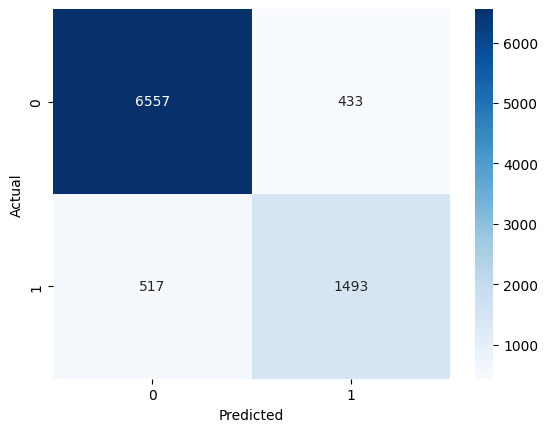

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.78      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000



In [38]:
print(f"Accurary: {accuracy_score(y_test, y_pred):.2f}")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#classification report
print(classification_report(y_test, y_pred))